<a href="https://colab.research.google.com/github/layali64/ML-DL-Projects/blob/main/Multi_Class_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed Classification

multi-class image classifier using TensorFlow

## 1.Problem
Identifying the breed of a dog given an image of a dog.

## 2.Data

from Kaggle's dog breed

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features

Information about data:
* Images(unstructured data), using deep learning/ transfer learning.
* 120 breeds of dogs (120 different classes)
* 10,000+ images in training set with labels.
* 10,000+ images in test set without labels (will predict them).


In [1]:
# !unzip "drive/MyDrive/DogVision/train.zip" -d "drive/MyDrive/DogVision/train"
# !unzip "drive/MyDrive/DogVision/test.zip" -d "drive/MyDrive/DogVision/test"

In [2]:
# Necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF Hub version:",hub.__version__)


# Check for GPU availability
print("GPU","available(Yes)" if tf.config.list_physical_devices ("GPU") else "not available (No) " )

TF version: 2.6.0
TF Hub version: 0.12.0
GPU not available (No) 



## Getting Data



accessing to data and checking labels.



In [3]:
# Checkout the labels of our data 
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/DogVision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     1831f3ce615ffe27a78c5baa362ac677  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


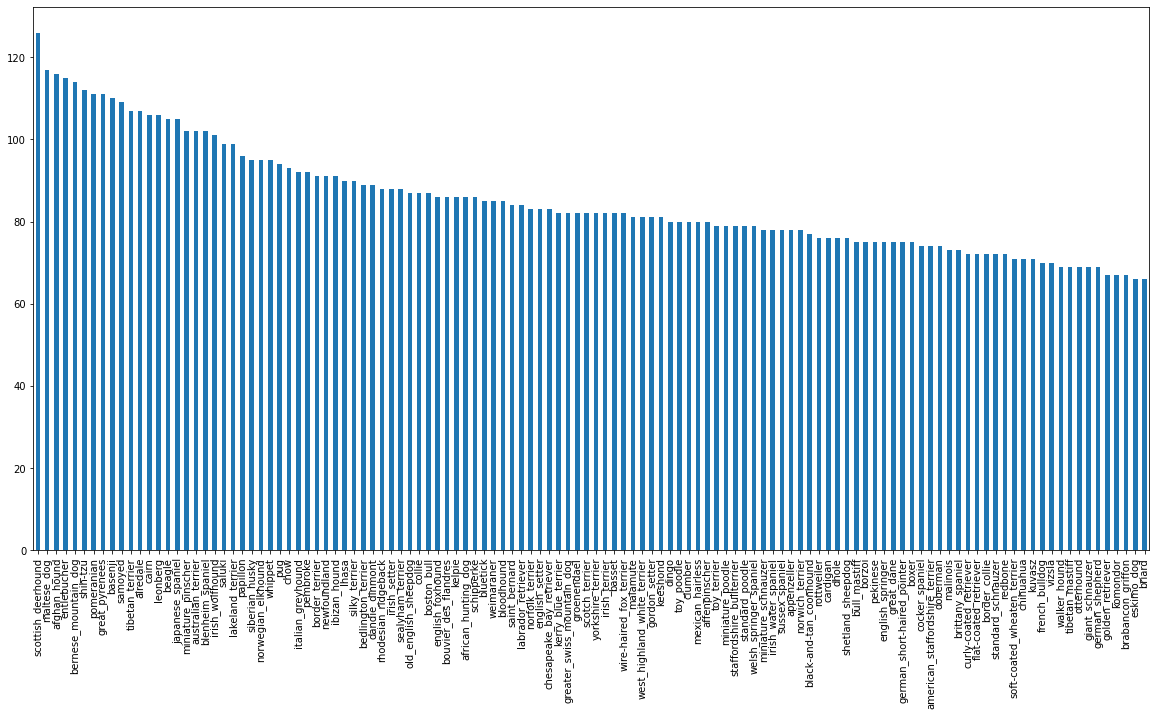

In [4]:
# How many images in each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));


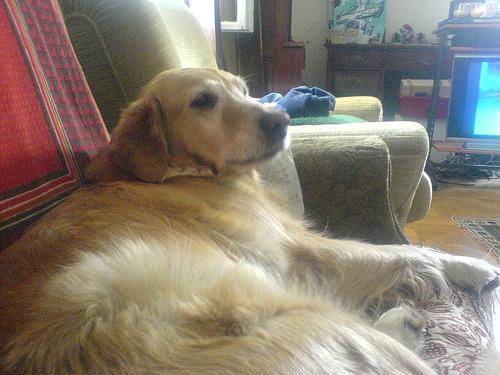

In [5]:
# Let's view an image
from IPython.display import Image
Image("drive/MyDrive/DogVision/train/00a366d4b4a9bbb6c8a63126697b7656.jpg")

## Getting images and their labels

List of the images file pathnames

In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/DogVision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames [:10]

['drive/MyDrive/DogVision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/DogVision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/DogVision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/DogVision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/DogVision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/DogVision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/DogVision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/DogVision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/DogVision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/DogVision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

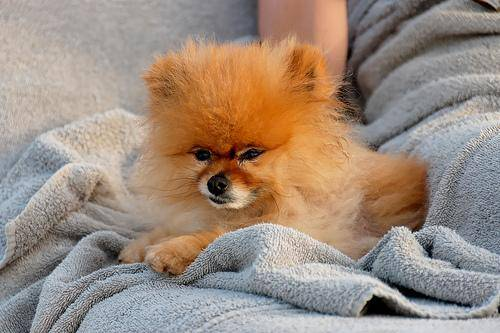

In [8]:
Image(filenames[8000])

In [9]:
labels_csv["breed"][8000]

'pomeranian'

After training image filepaths, Preparing the label



In [10]:
import numpy as np

labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [11]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [12]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [13]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]


[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
# Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set




In [15]:
# Setup X & Y variable
x = filenames
y = boolean_labels

In [16]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param{type:"slider", min:1000 , max:10000, step:1000}

In [17]:
# Split data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)


(800, 800, 200, 200)

In [18]:
# have a geez at the training data
x_train[:5],y_train[:2]

(['drive/MyDrive/DogVision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/DogVision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/DogVision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/DogVision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/DogVision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False

## Preprocessing Images (turning into Tensors)

turning images into Tensor, with all ML models data has to be numerical format.

Write a function which does:
1. Take an image filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalized our image (convert color channel values from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified image
what importing an image looks like


In [19]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red,Green,Blue)
  image = tf.image.decode_jpeg(image,channels=3)
  # Convert the colour channel values from 0-255 to 0-1 values (Normalization)
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image to our desired value (224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  
  return image


## Turning our data into batches


use TensorFlow effectively, data should be in the form of Tensor tuples (image,label).


In [20]:
# Create s simple function to return a tuple (image,label)

def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,processes the image and returns a type of (image,label).
  """
  image = process_image(image_path)
  return image,label
  

In [21]:
# Demo of the above
(process_image(filenames[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [22]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE,valid_data=False,test_data = False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  shuffles the data if it is training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is test data set, we don't have labels.
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
      print("Creating validation data batches...")
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                                 tf.constant(y))) # labels
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)
      return data_batch

  else:
      print("Creating training data batches...")
      # Turn filepaths and labels into Tensors
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
      # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
      data = data.shuffle(buffer_size = len(x))
      
      # Create (image,label) tuples (this also turns the image path into a preprocessed image)
      data = data.map(get_image_label)

      # Turn the training data into batches
      data_batch = data.batch(BATCH_SIZE)
      return data_batch

In [23]:
# Creating training and validation data batches
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data = True)

Creating training data batches...
Creating validation data batches...


In [24]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing Data Batches

In [25]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images,labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 image)
  for i in range(25):
    # Create subplots (5 rows , 5 columns)
    ax = plt.subplot(5,5,i+1)  #(row,column, index)
    # Display an image 
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    # plt.axis("off")

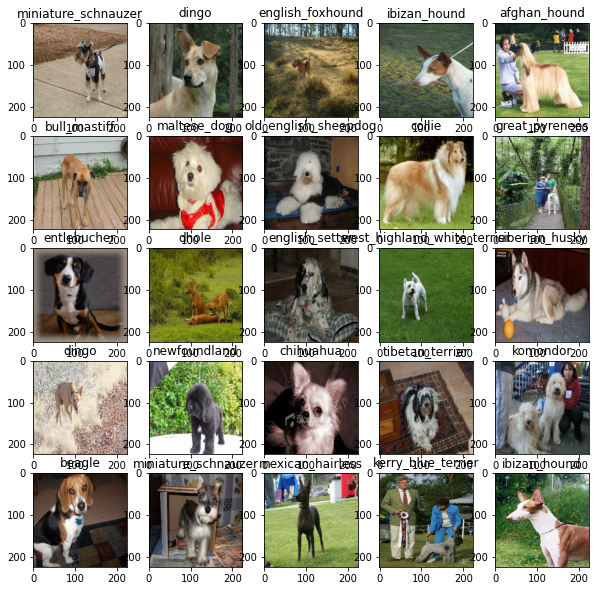

In [26]:
# Now visualize the data in tarining batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

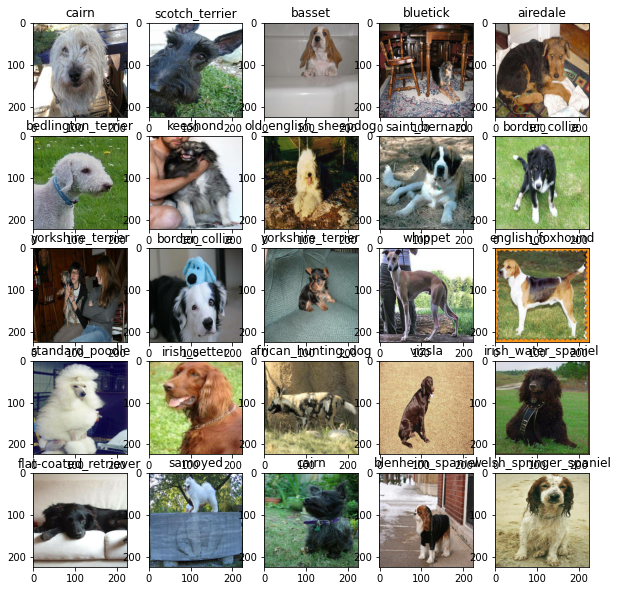

In [27]:
# Now visualize the validation set 
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building a model

Before building a model:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensor) of our model.
* The URL of the model we want to use. from TensorFlow Hub.

In [28]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE,3]  # batch, heighht, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Create a function:
* Takes the input shape, output shape and the model as parameters.
* Defines the layers in a Keras model in sequentioal fashion.
* compiles the model ( evaluated and improved).
* Builds the model.
* Return the model.


In [29]:
# Create a function which builds a Keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("Building model with:", MODEL_URL)

  #Setup the model layers
  model = tf.keras.Sequential([
                                  hub.KerasLayer(MODEL_URL),  # Layer 1 (input layer)
                                  tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                  activation = "softmax") # Layers 2 (output layer)
                                  ])
  # Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)
  return model

In [30]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.
Two callbacks:
* for TensorBoard: track the model progress.
* for early stopping: prevents the model from training for too long.

### TensorBoard Callback

Setup a TensorBoard callback:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (after model training).

In [31]:
# Load TensorBoear notebook extension
%load_ext tensorboard

In [32]:
import datetime
import os 
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/DogVision/logs",
                        # Make it so the logs ge,strt tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


### Early Stopping Callback

stop the model from overfitting by stopping training if a certain evaluation metric stops improving.

In [33]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience = 3)

## Training a model (on subset of data)

train on 1000 images, to make sure everything is working.

In [34]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

Create a function to train a model:
* Create a model using create_model()
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [35]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """

  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,  # check validation metrics every epoch
            callbacks=[tensorboard,early_stopping])
  # Return the fitted model
  return model

In [36]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 107s 4s/step - loss: 4.4124 - accuracy: 0.1238 - val_loss: 3.3652 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 40s 2s/step - loss: 1.5463 - accuracy: 0.7063 - val_loss: 2.1900 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 37s 1s/step - loss: 0.5311 - accuracy: 0.9488 - val_loss: 1.7223 - val_accuracy: 0.5750
Epoch 4/100
25/25 [==============================] - 40s 2s/step - loss: 0.2397 - accuracy: 0.9875 - val_loss: 1.5326 - val_accuracy: 0.6050
Epoch 5/100
25/25 [==============================] - 40s 2s/step - loss: 0.1419 - accuracy: 0.9975 - val_loss: 1.4381 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 37s 1s/step - loss: 0.0970 - accuracy: 1.0000 - val_loss: 1.3965 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================] - 37s 1s/

The model is overfitting because it is performing far better on training 
dataset than the validation dataset. How to prevent to overfitting in deep learning.


Overfitting to begin means that the model is learning.

### Checking the TensorBoard logs

The TensorBoard magic functon (%tensorboard) will access the logs directory we created earlier and visualize its contents.


In [ ]:
%tensorboard --logdir drive/MyDrive/DogVision/logs

## Making and evaluating predictions using a trained model

In [38]:
# Make prediction on validarion data (not use to train on)
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 9s 1s/step


array([[6.9774990e-04, 2.5072062e-05, 8.8120240e-04, ..., 5.3100848e-05,
        2.3059612e-05, 2.0979755e-03],
       [1.0683363e-03, 2.4539229e-04, 2.8426711e-02, ..., 1.3157633e-03,
        1.6780846e-03, 6.7467830e-05],
       [4.8550983e-06, 6.2845520e-06, 4.5548527e-06, ..., 6.6028829e-06,
        7.7979951e-07, 1.0225000e-05],
       ...,
       [6.6691723e-06, 2.8556820e-05, 7.9361989e-06, ..., 5.2259643e-06,
        7.4834395e-05, 5.1827519e-05],
       [3.3835724e-03, 6.6876768e-05, 1.5781700e-04, ..., 2.5423897e-05,
        1.0158111e-04, 7.4912007e-03],
       [2.2490734e-04, 1.5241361e-05, 2.1563151e-03, ..., 2.7737410e-03,
        2.2487475e-03, 3.5511450e-05]], dtype=float32)

In [39]:
# First prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")



[5.57410458e-05 2.33121027e-04 2.87262992e-05 1.43149737e-04
 1.60445133e-03 4.37621638e-05 1.56964103e-04 6.45666209e-04
 9.30070225e-03 1.50822615e-02 1.32806817e-05 7.56828831e-06
 1.63512072e-04 2.40724394e-03 6.98255491e-04 3.07111000e-03
 1.92168009e-05 3.42955027e-05 4.20711367e-05 4.26016573e-04
 1.16780093e-05 8.39329005e-05 6.86067433e-05 1.29608001e-04
 1.16966013e-02 6.67609056e-05 6.27796453e-06 1.37134019e-04
 9.77775635e-05 3.12279299e-05 2.89504151e-05 3.11240183e-05
 1.59287956e-05 1.06184780e-05 5.42202542e-05 3.49487855e-05
 2.83550995e-04 2.69467302e-04 4.31531516e-05 3.06821346e-01
 2.93766760e-04 8.84272504e-06 3.21484660e-03 7.83324867e-06
 8.06547614e-05 1.26107960e-04 3.43769098e-05 1.06872269e-03
 3.68669025e-05 9.42025727e-05 3.41887862e-05 1.43797472e-04
 5.24923438e-04 2.83569912e-03 3.49416550e-05 2.71172757e-04
 2.27122073e-04 4.06182335e-05 1.19983313e-04 9.48841534e-06
 6.38318379e-05 4.97762579e-04 2.96968074e-06 1.30005801e-05
 5.03644187e-05 2.999599

* Prediction probabilities are also known as confidence levels.

In [40]:
# Turn predictoin probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of predictoin probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

  # Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label


'irish_wolfhound'

In [41]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

validation data is in batch dataset format, unbatchify to make predictions on validation images and then compare those predictions to the validation label (truth label)

In [42]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image,label) Tensors and returns separate arrays of images and labels.
  """

  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels



In [43]:

# Unbachify the validation data 
val_images,val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [44]:
get_pred_label(val_labels[0])

'affenpinscher'

In [45]:
images_ = []
labels_ = []

# Loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

In [46]:
images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [47]:
get_pred_label(labels_[0])

'cairn'

In [48]:
get_pred_label(predictions[0])

'irish_wolfhound'

We got :
* Prediction labels
* Validation labels(truth labels)
* Validation images


Create a function which:
* Takes an array of predicion probabilities, an array of truth labels and an array of images and an integer.
* Convert the prediction probabilities to a prediction label.
* Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [49]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)


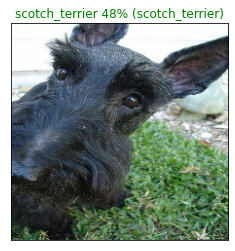

In [50]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Function for top 10 predictions
* Take an input of prediction probabilities array and a ground truth array and an integer.
* Find the prediction using get_pred_label()
* Find thr top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green

In [51]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """

  pred_prob, true_label = prediction_probabilities[n],labels[n]

  # Get the prediction label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values =pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_values,
                    color= "grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
            labels=top_10_pred_labels,
            rotation="vertical")

  # change color of the true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


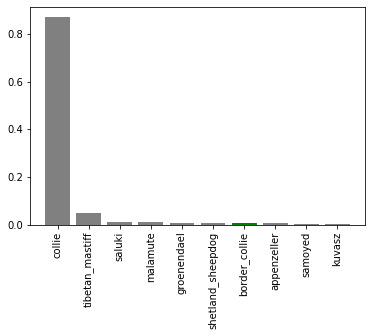

In [52]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels, 
               n=9)

In [53]:
predictions[0].argsort()[-10:][::-1] # top 10 indexes

array([ 59,  26,  70,  65,  17, 106,  73, 103,   6, 102])

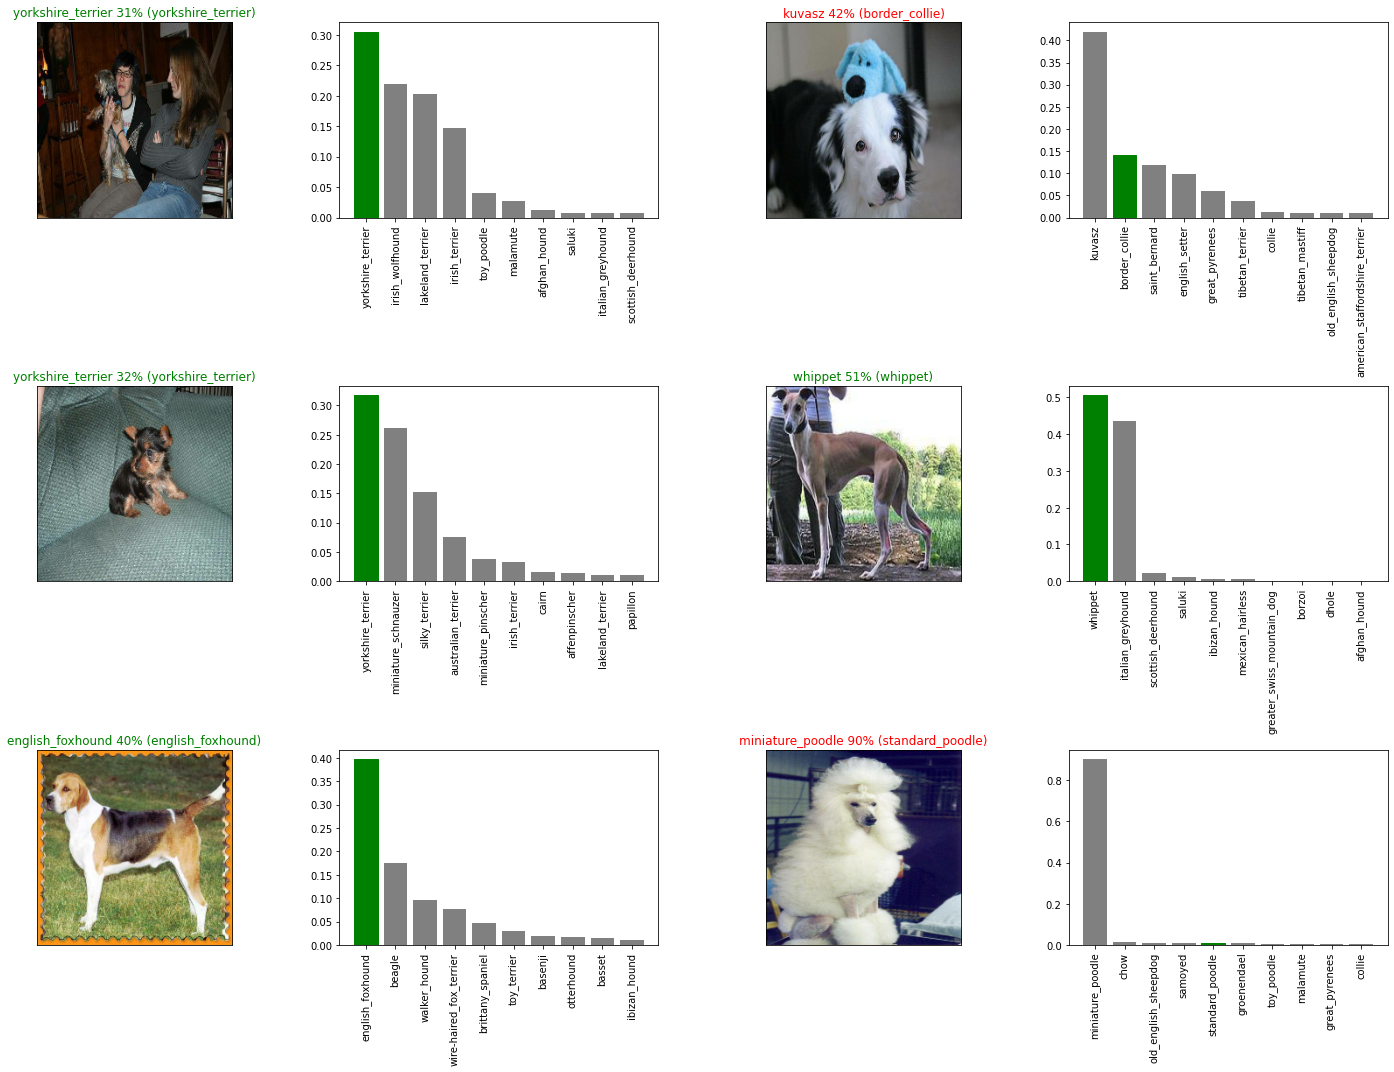

In [54]:
# Check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n= i + i_multiplier)
  
  
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [55]:
# Create a function to save a model
def save_model(model,suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/DogVision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print (f"Saving model to: {model_path} ...")
  model.save(model_path)
  return model_path


In [56]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model =tf.keras.models.load_model(model_path,
                                    custom_objects = {"KerasLayer":hub.KerasLayer})
  return model

In [57]:
# Save the model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/DogVision/models/20210907-12451631018740-1000-images-mobilenetv2-Adam.h5 ...


'drive/MyDrive/DogVision/models/20210907-12451631018740-1000-images-mobilenetv2-Adam.h5'

In [58]:
# Load a trained model
loaded_1000_image_model = load_model("drive/MyDrive/DogVision/models/20210814-10061628935570-1000-images-mobilenetv2-Adam.h5")


Loading saved model from: drive/MyDrive/DogVision/models/20210814-10061628935570-1000-images-mobilenetv2-Adam.h5


In [59]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 9s 1s/step - loss: 1.2398 - accuracy: 0.6900


[1.2398276329040527, 0.6899999976158142]

In [60]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 8s 1s/step - loss: 1.2725 - accuracy: 0.6550


[1.2725242376327515, 0.6549999713897705]

## Training a big dog model (on full data)

In [61]:
len(x),len(y)

(10222, 10222)

In [62]:
# Create a data batch with the full data set
full_data = create_data_batches(x,y)

Creating training data batches...


In [63]:
# Create a model for full model
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [64]:
# Create full model callback
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data , so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor= "accuracy",
                                                             patience = 3)

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs = NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])
               

Epoch 1/100
182/320 [================>.............] - ETA: 7:14 - loss: 1.7690 - accuracy: 0.5862

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
# Load in the full model
loaded_full_model = load_model("drive/MyDrive/DogVision/models/20210814-15191628954344-full-image-set-mobilenetv2-Adam.h5")

## Making  predictions on the test dataset

Our model has been trained on images in the form of Tensor batches, to make prediction on the test data, we have to get it into the same format.

create_data_batches(): can take a list of filename as input and convert them to Tensor batches.

To make predictions on the test data:
* Get the test image filename
* Convert the filenames into test data batches using create_data_batches() and setting the test_data paramater to True (test data doesn't have labels)
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [ ]:
# Load test images filenames
test_path ="drive/MyDrive/DogVision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames [:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data = True)

In [ ]:
test_data 

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

In [ ]:
# Save predictions (NumPy array) to csv file (for access later)
np.savetxt("drive/MyDrive/DogVision/preds_array.csv",test_predictions,delimiter=",")

In [ ]:
# Load predictions (NumPy array) from csv file
test_predictions = np.loadtxt("drive/MyDrive/DogVision/preds_array.csv",delimiter=",")

In [ ]:
test_predictions[:10]

In [ ]:
test_predictions.shape

## Preparing test dataset predictions

Our models prediction probability outputs in a DataFrame with an ID and a column for each different dog breed.

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the DataFrames as a CSV.

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns= ["id"]+ list(unique_breeds))
preds_df

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df ["id"] = test_ids

In [ ]:
preds_df.head()

In [ ]:
os.path.splitext(test_filenames[0])

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

In [ ]:
# Save our predictions dataFrame to CSV for submission to Kaggle
preds_df.to_csv("drive/MyDrive/DogVision/full_model_prediction_submission_1_mobilenetV2.csv",
                index=False)

## Making predictions on custom images

To make predictions on custom images:

* Get the filepaths of our own images.
* Turn the filepaths into data batches using  create_data_batches(). and our custom images don't have labels, we set the test_data parameter to True.
* Pass the custom image data batch to our model's predict() method.
* convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to the custom images.

In [ ]:
# Get custom image filepaths
custom_path = "drive/MyDrive/DogVision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]


In [ ]:
custom_image_paths

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths,test_data=True)
custom_data

In [ ]:
# Make predictions on the custom data
custom_preds= loaded_full_model.predict(custom_data)


In [ ]:
custom_preds.shape

In [ ]:
# Get custom image prediction label
custom_pred_labels = [get_pred_label(custom_preds[i])for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
# Get custom images (our unbatchify () function won't work since there aren't labels ... maybe we could fix this later)
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
# Check custom image predictions
plt.figure(figsize=(15, 20))
for i, image in enumerate(custom_images):
  plt.subplot(1, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)
